In [9]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pylab as plt
from torchvision import datasets, transforms

In [34]:
datasets.MNIST?

Init signature:
datasets.MNIST(
    root,
    train=True,
    transform=None,
    target_transform=None,
    download=False,
)
Docstring:     
`MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.

Args:
    root (string): Root directory of dataset where ``processed/training.pt``
        and  ``processed/test.pt`` exist.
    train (bool, optional): If True, creates dataset from ``training.pt``,
        otherwise from ``test.pt``.
    download (bool, optional): If true, downloads the dataset from the internet and
        puts it in root directory. If dataset is already downloaded, it is not
        downloaded again.
    transform (callable, optional): A function/transform that  takes in an PIL image
        and returns a transformed version. E.g, ``transforms.RandomCrop``
    target_transform (callable, optional): A function/transform that takes in the
        target and transforms it.
File:           /opt/conda/lib/python3.6/site-packages/torchvision/datasets/mnist.py
Type:           t

In [66]:
transform = transforms.ToTensor()

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('MNIST_data/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [32]:
data_iter = iter(trainloader)
images, labels = data_iter.next()
print(type(images))
print(images.shape, labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28]) torch.Size([64])


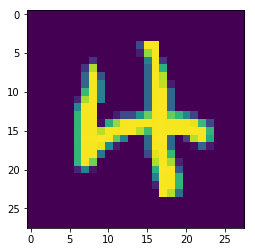

In [33]:
plt.imshow(images[1].numpy().squeeze())

In [38]:
def activation(x):
    return 1/(1+torch.exp(-x))

inputs = images.view(images.shape[0], -1)
print(images.shape, inputs.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64, 784])


In [39]:
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)
out = torch.mm(h, w2) + b2     # 属于各个数字的分布

In [48]:
print(out.shape, labels.shape)
print("labels: ", labels[:4])
out[:4]   # 没有经过训练，分布还对应不上

torch.Size([64, 10]) torch.Size([64])
labels:  tensor([2, 4, 8, 4])


tensor([[  0.3913, -12.5249,   7.6558,  -9.5013,   4.7528,  -3.1489, -16.7274,
           6.7377,   2.1634,  -6.4114],
        [ -9.7542, -15.7317,  16.6697, -12.3902,  -1.6166,  -7.1777,  -7.4016,
          10.9677,   7.3043,  -8.9195],
        [ -2.2503,   0.5217,   2.3960,  -8.8337,  -2.0826,  -3.5904, -19.4348,
           4.9641,   0.7638, -12.3266],
        [-13.3044, -19.4099,   4.5646,  -5.7069,  -0.5667,  -4.4339, -10.3709,
           2.6410,   6.4628, -12.0158]])

In [50]:
def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1, 1)

# 计算概率
probs = softmax(out)
print(probs[:4])
print(probs.shape, probs.sum(dim=1))

tensor([[4.7977e-04, 1.1792e-09, 6.8541e-01, 2.4250e-08, 3.7601e-02, 1.3917e-05,
         1.7638e-11, 2.7368e-01, 2.8223e-03, 5.3289e-07],
        [3.3324e-12, 8.4487e-15, 9.9659e-01, 2.3875e-13, 1.1400e-08, 4.3826e-11,
         3.5034e-11, 3.3281e-03, 8.5345e-05, 7.6788e-12],
        [6.6587e-04, 1.0647e-02, 6.9378e-02, 9.2096e-07, 7.8742e-04, 1.7433e-04,
         2.2922e-11, 9.0478e-01, 1.3564e-02, 2.8010e-08],
        [2.2185e-09, 4.9487e-12, 1.2778e-01, 4.4220e-06, 7.5507e-04, 1.5793e-05,
         4.1694e-08, 1.8666e-02, 8.5278e-01, 8.0484e-09]])
torch.Size([64, 10]) tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000

In [59]:
from torch import nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # 输入768特征，输出特征256
        self.hidden = nn.Linear(768, 256)
        self.output = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forword(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        # x = F.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        # x = F.softmax(x, dim=1)
        return x

In [60]:
model = Network()
model

Network(
  (hidden): Linear(in_features=768, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [71]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
model

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

In [83]:
# 前向计算loss
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
print(images.shape)
images = images.view(images.shape[0], -1)
print(images.shape)
logps = model(images)
loss = criterion(logps, labels)
loss

torch.Size([64, 1, 28, 28])
torch.Size([64, 784])


tensor(2.2915, grad_fn=<NllLossBackward>)

In [74]:
x = torch.zeros(1, requires_grad=True)
with torch.no_grad():
    y = x * 2
    
print(x, y.requires_grad)

tensor([0.], requires_grad=True) False


In [78]:
x = torch.randn(2, 2, requires_grad=True)
y = x ** 2
print(x, y)
print(y.grad_fn)   # PowBackward0: 幂，反向传播

tensor([[ 1.1708, -0.7890],
        [ 0.8358, -0.4550]], requires_grad=True) tensor([[1.3708, 0.6224],
        [0.6985, 0.2070]], grad_fn=<PowBackward0>)


In [79]:
print(x.grad)    # 这里尚未进行梯度计算

None


In [81]:
# 反向计算梯度
z = y.mean()
z.backward()
print(z)
print(x.grad)
print(x/2)

tensor(0.7247, grad_fn=<MeanBackward1>)
tensor([[ 0.5854, -0.3945],
        [ 0.4179, -0.2275]])
tensor([[ 0.5854, -0.3945],
        [ 0.4179, -0.2275]], grad_fn=<DivBackward0>)


In [84]:
print('反向传播前的梯度', model[0].weight.grad)
loss.backward()
print('反向传播后的梯度', model[0].weight.grad)

反向传播前的梯度 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
反向传播后的梯度 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [87]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.01)
print(model.parameters(), optimizer)

<generator object Module.parameters at 0x7f4ea295d0a0> SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [90]:
print('init weights: ', model[0].weight)

images, labels = next(iter(trainloader))
print(images.shape)
images = images.view(images.shape[0], -1)
output = model.forward(images)

criterion = nn.NLLLoss()
loss = criterion(output, labels)
print(loss)
print('after gradient: ', model[0].weight.grad)

init weights:  Parameter containing:
tensor([[ 0.0063, -0.0260, -0.0060,  ..., -0.0098, -0.0287,  0.0238],
        [-0.0103, -0.0260,  0.0270,  ...,  0.0325, -0.0270, -0.0182],
        [ 0.0199, -0.0280, -0.0144,  ...,  0.0318,  0.0099, -0.0046],
        ...,
        [ 0.0183, -0.0291,  0.0239,  ...,  0.0253,  0.0256,  0.0090],
        [ 0.0099,  0.0283,  0.0080,  ...,  0.0314,  0.0079, -0.0162],
        [-0.0057,  0.0036, -0.0335,  ...,  0.0029, -0.0320, -0.0136]],
       requires_grad=True)
torch.Size([64, 1, 28, 28])
tensor(2.3113, grad_fn=<NllLossBackward>)
after gradient:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [91]:
optimizer.zero_grad()
optimizer.step()
print('update weights: ', model[0].weight)

update weights:  Parameter containing:
tensor([[ 0.0063, -0.0260, -0.0060,  ..., -0.0098, -0.0287,  0.0238],
        [-0.0103, -0.0260,  0.0270,  ...,  0.0325, -0.0270, -0.0182],
        [ 0.0199, -0.0280, -0.0144,  ...,  0.0318,  0.0099, -0.0046],
        ...,
        [ 0.0183, -0.0291,  0.0239,  ...,  0.0253,  0.0256,  0.0090],
        [ 0.0099,  0.0283,  0.0080,  ...,  0.0314,  0.0079, -0.0162],
        [-0.0057,  0.0036, -0.0335,  ...,  0.0029, -0.0320, -0.0136]],
       requires_grad=True)


In [103]:
def train(trainloader, epochs=5):
    model = nn.Sequential(nn.Linear(784, 256),
                         nn.ReLU(),
                         nn.Linear(256, 64),
                         nn.ReLU(),
                         nn.Linear(64, 10),
                         nn.LogSoftmax(dim=1))
    criterion = nn.NLLLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    
    for e in range(epochs):
        running_loss = 0
        for images, labels in trainloader:
            images = images.view(images.shape[0], -1)
            
            # training
            optimizer.zero_grad()
            # 前向计算loss
            output = model.forward(images)
            loss = criterion(output, labels)
            # 反向传播
            loss.backward()
            # 更新权重
            optimizer.step()
            running_loss += loss.item()
            # print(f"===> running loss: {running_loss}")
        else:
            print(f"train loss: {running_loss/len(trainloader)}")
            
    return model            

In [93]:
transform = transforms.ToTensor()

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('MNIST_data/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [104]:
model = train(trainloader)

train loss: 1.6545664177520443
train loss: 0.5446760411392143
train loss: 0.3949938140698333
train loss: 0.342950508721284
train loss: 0.3121384655885986


In [110]:
def predict(model, image):
    image = image.view(1, -1)
    with torch.no_grad():
        logits = model.forward(image)
        
    ps = F.softmax(logits, dim=1)
    return ps

In [115]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

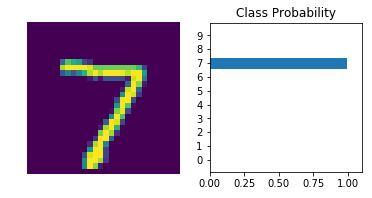

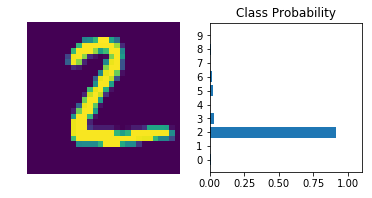

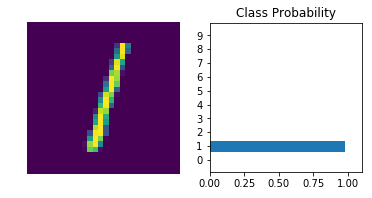

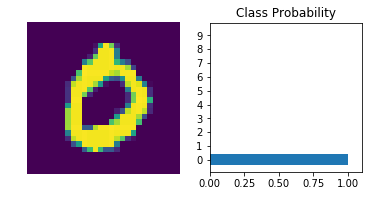

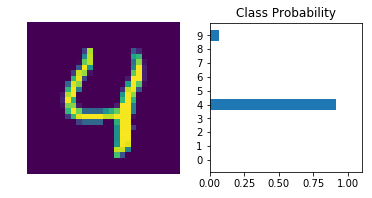

In [118]:
%matplotlib inline

images, labels = next(iter(testloader))
for i in range(5):
    ps = predict(model, images[i])
    view_classify(images[i].view(1, 28, 28), ps)

In [112]:
help(helper)

Help on package helper:

NAME
    helper

DESCRIPTION
    ....  ......        ....  .. .                  ....         .
    .... .......          .   ....                           ....       .        ..
    ............ . .....   .   ...                                      .       .
    ............   . ...      .....  .  . . . .. .  .     ..  .. ....      ..    . .
     ............. . ...   .............................  ... ......................
    ................ ..    . ,?.ZD++I:  ............................................
    ... ............ ...    , I7,,,,I7?,............................................
      ......................,O?7,..+Z+$=~...........................................
      .....................:D$::~,,=..N~I~. ........................................
    . .....................=O~.I~:?....I~?:.........................................
       ...................:7D.7~:~+,,,~.O+?.........................................
    . ....................=ZZ~8::